<a href="https://colab.research.google.com/github/AryanGoyal123/Machine-learning-Projects/blob/main/Irisdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# in this project we will be using the Iris data set and deploying using API flask
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['iris.csv']))
# Dataset is now stored in a Pandas Dataframe

In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
X = df.drop('species', axis = 1)

In [ ]:
y = df['species']

In [ ]:
y.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y = encoder.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [ ]:
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(units = 4, activation = 'relu', input_shape = [4,]))
model.add(Dense(units = 3, activation = 'softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(patience=10)

In [ ]:
model.fit(x=scaled_X_train, 
          y=y_train, 
          epochs=300,
          validation_data=(scaled_X_test, y_test), verbose=1 ,callbacks=[early_stop] )  

Epoch 1/300
4/4 [==============================] - 1s 61ms/step - loss: 1.1900 - accuracy: 0.2500 - val_loss: 1.1663 - val_accuracy: 0.3000
Epoch 2/300
4/4 [==============================] - 0s 9ms/step - loss: 1.1840 - accuracy: 0.2583 - val_loss: 1.1614 - val_accuracy: 0.3000
Epoch 3/300
4/4 [==============================] - 0s 12ms/step - loss: 1.1780 - accuracy: 0.2667 - val_loss: 1.1560 - val_accuracy: 0.3000
Epoch 4/300
4/4 [==============================] - 0s 11ms/step - loss: 1.1716 - accuracy: 0.2500 - val_loss: 1.1508 - val_accuracy: 0.3000
Epoch 5/300
4/4 [==============================] - 0s 10ms/step - loss: 1.1662 - accuracy: 0.2583 - val_loss: 1.1458 - val_accuracy: 0.3000
Epoch 6/300
4/4 [==============================] - 0s 9ms/step - loss: 1.1608 - accuracy: 0.2667 - val_loss: 1.1407 - val_accuracy: 0.3000
Epoch 7/300
4/4 [==============================] - 0s 9ms/step - loss: 1.1554 - accuracy: 0.2667 - val_loss: 1.1356 - val_accuracy: 0.3000
Epoch 8/300
4/4 [======

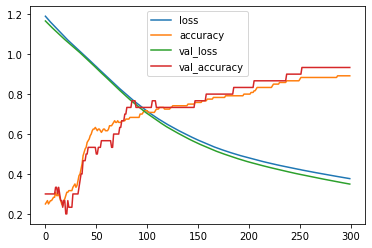

In [ ]:
metrics = pd.DataFrame(model.history.history)
metrics.plot()

In [ ]:
model.evaluate(scaled_X_test,y_test,verbose=0)

[0.34944862127304077, 0.9333333373069763]

In [ ]:
#ready for deployment from here with 90% validation
#we are doing to now make the model again and train with all the data

In [ ]:
epochs = len(metrics)

In [ ]:
scaled_X =  scaler.fit_transform(X)

In [ ]:
model = Sequential() #make the model with all the data for training
model.add(Dense(units=4,activation='relu'))

# Last layer for multi-class classification of 3 species
model.add(Dense(units=3,activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(scaled_X, y,epochs = epochs)

Epoch 1/300
5/5 [==============================] - 1s 4ms/step - loss: 1.1405 - accuracy: 0.3333
Epoch 2/300
5/5 [==============================] - 0s 4ms/step - loss: 1.1349 - accuracy: 0.3333
Epoch 3/300
5/5 [==============================] - 0s 6ms/step - loss: 1.1296 - accuracy: 0.3333
Epoch 4/300
5/5 [==============================] - 0s 4ms/step - loss: 1.1246 - accuracy: 0.3333
Epoch 5/300
5/5 [==============================] - 0s 4ms/step - loss: 1.1198 - accuracy: 0.3333
Epoch 6/300
5/5 [==============================] - 0s 4ms/step - loss: 1.1145 - accuracy: 0.3333
Epoch 7/300
5/5 [==============================] - 0s 5ms/step - loss: 1.1097 - accuracy: 0.3333
Epoch 8/300
5/5 [==============================] - 0s 7ms/step - loss: 1.1046 - accuracy: 0.3333
Epoch 9/300
5/5 [==============================] - 0s 5ms/step - loss: 1.0997 - accuracy: 0.3333
Epoch 10/300
5/5 [==============================] - 0s 5ms/step - loss: 1.0950 - accuracy: 0.3333
Epoch 11/300
5/5 [===========

In [ ]:
model.save("final_iris_model.h5")

In [ ]:
#essentially saving the scaler in order to apply it on the new data
import joblib
joblib.dump(scaler,'iris_scaler.pkl')

['iris_scaler.pkl']

In [ ]:
#predicting on a new flower never seen before on our model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
flower_model = load_model("final_iris_model.h5")
flower_scaler = joblib.load("iris_scaler.pkl")

In [ ]:
df.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [ ]:
flower_example = {'sepal_length':5.1,
                 'sepal_width':3.5,
                 'petal_length':1.4,
                 'petal_width':0.2}

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
import tensorflow as tf

In [ ]:
def return_prediction(model,scaler,sample_json):
    
    # For larger data features, you should probably write a for loop
    # That builds out this array for you
    
    s_len = sample_json['sepal_length']
    s_wid = sample_json['sepal_width']
    p_len = sample_json['petal_length']
    p_wid = sample_json['petal_width']
    
    flower = [[s_len,s_wid,p_len,p_wid]]
    
    flower = scaler.transform(flower)
    
    classes = np.array(['setosa', 'versicolor', 'virginica'])
  
    predict_x=model.predict(flower) 
    class_ind =np.argmax(predict_x,axis=1)
    
    return classes[class_ind][0]
                    
    

In [ ]:
return_prediction(flower_model,flower_scaler,flower_example)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


'setosa'

In [ ]:
#code for deployment

In [ ]:
pip install tensorflow

In [ ]:
from tensorflow.keras.models import load_model
import joblib

flower_model = load_model("final_iris_model.h5")
flower_scaler = joblib.load("iris_scaler.pkl")

def return_prediction(model,scaler,sample_json):
    
    # For larger data features, you should probably write a for loop
    # That builds out this array for you
    
    s_len = sample_json['sepal_length']
    s_wid = sample_json['sepal_width']
    p_len = sample_json['petal_length']
    p_wid = sample_json['petal_width']
    
    flower = [[s_len,s_wid,p_len,p_wid]]
    flower = scaler.transform(flower)
    classes = np.array(['setosa', 'versicolor', 'virginica'])
    
    predict_x=model.predict(flower) 
    class_ind =np.argmax(predict_x,axis=1)
    
    return classes[class_ind]